# &AElig;co
***Calc module***
<br/><br/>

✈️♻️

This code is part of the Master's Thesis "A Life Cycle Approach for Aircraft Ecodesign", by Giácomo Parolin.

``Please enter the following information:``

In [1]:
import os
os.chdir("C:/Users/Parolin/Documents/Projects/AEco")

aircraft_type = 'cargo'  #pax or cargo

input_path = './Data/mistral_whatif.xlsx'
input_sheet = 'Composite'
output_path = './Outputs/'+ input_sheet + '_outputs'
database_path = './Data/database_mistral.xlsx'

iterations = 100000
chunks = 1000  #'auto' or more than 500

In [1]:
import os
os.chdir("C:/Users/Parolin/Documents/Projects/AEco")

aircraft_type = 'cargo'  #pax or cargo

input_path = './Data/mistral_whatif.xlsx'
input_sheet = 'Composite_fuel'
output_path = './Outputs/'+ input_sheet + '_outputs'
database_path = './Data/database_mistral.xlsx'

iterations = 100000
chunks = 1000  #'auto' or more than 500

In [2]:
from Tools import *
from Model import *

# LCI

The aircraft's life cycle was divided into four parts:
1. Development and Engineering
2. Manufacturing and Assembly
3. Operation
4. End-of-Life

First, we execute function to read inputs from designated `input_path` and transform it into Parameters and ParameterSet object `p`.

In [36]:
del inputs, p, inventory

In [37]:
inputs = read_inputs(input_path, input_sheet)

In [38]:
p = ParameterSet(inputs, iterations, chunks)

Samples are stored in a xr.Dataset object accessible throught the `p.data` ParameterSet attribute.

Then, we run the function that calculates PKM for the study.

In [39]:
p = pkm(aircraft_type, p)

<br></br>
Executing the UP reading and writing functions.

In [20]:
UP_dataframe = read_unit_processes(database_path)

In [21]:
UP = unit_process_dataset(UP_dataframe)

Building the empty LCI to start the calculation.

In [40]:
inventory = LCI(name=input_sheet, type=aircraft_type, iterations=iterations, UP=UP, parameters=p)

In [41]:
inventory.run()

,Array,Chunk
Bytes,1.47 GB,14.68 MB
Shape,"(1835, 100000)","(1835, 1000)"
Count,8808 Tasks,100 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,1.47 GB,14.68 MB
Shape,"(1835, 100000)","(1835, 1000)"
Count,3101 Tasks,100 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


The LCI data can be accessed by the `LCI.data` attribute.

# LCIA

Extracting the characterization factors from the excel file located in `database_path`.

In [24]:
MP_data, EP_data = read_CF(database_path)

Creating an instance of the characterization factors class:

In [25]:
CF = CharactFactors(MP_data, EP_data, UP.Substances)

Adjusting the NLT category CFs.

In [26]:
CF.MP.dataset['NLT'].data = np.negative(CF.MP.dataset['NLT'].data)
CF.MP.to_array();

The impacts CFs can be accessed by the `CharactFactors.Midpoint.dataset` or `CharactFactors.Endpoint.dataset` attributes.

In [27]:
display(CF.MP.dataset)
display(CF.EP.dataset)

<xarray.Dataset>
Dimensions:         (Substances: 1835)
Coordinates:
  * Substances      (Substances) MultiIndex
  - name            (Substances) object 'Carbon dioxide, fossil' ... 'Zirconi...
  - compartment     (Substances) object 'Air' 'Air' 'Air' ... 'Water' 'Air'
  - subcompartment  (Substances) object 'urban air close to ground' ... 'non-...
Data variables:
    FE              (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    MRD             (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    POF             (Substances) float64 0.0 0.0 1.0 0.0456 ... 0.0 0.0 0.0 0.0
    MET             (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    TA              (Substances) float64 0.0 0.0 0.56 0.0 ... 0.0 0.0 0.0 0.0
    ULO             (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    PMF             (Substances) float64 0.0 0.0 0.22 0.0 ... 0.0 0.0 0.0 0.0
    TET             (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    FET             (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    NLT             (Substances) float64 -0.0 -0.0 -0.0 -0.0 ... -0.0 -0.0 -0.0
    OD              (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ME              (Substances) float64 0.0 0.0 0.039 0.0 ... 0.0 0.0 0.0 0.0
    ALO             (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    HT              (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    IR              (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    FD              (Substances) float64 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    WD              (Substances) float64 0.0 1.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    CC              (Substances) float64 1.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0

<xarray.Dataset>
Dimensions:     (Categories: 18)
Coordinates:
  * Categories  (Categories) object 'CC' 'OD' 'TA' 'FE' ... 'WD' 'MRD' 'FD'
Data variables:
    HH          (Categories) float64 1.4e-06 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    ED          (Categories) float64 7.93e-09 0.0 5.8e-09 ... 0.0 0.0 0.0
    RA          (Categories) float64 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0715 0.165

<br></br>
**Executing the Impact Assessment.**

In [ ]:
del composite

In [44]:
composite = LCIA.build(inventory, CF)

In [29]:
composite.mean(pathway="EP", by="sum")

<xarray.DataArray 'stack-f34238b91e3a459e01fdceb1b16d0f63' (AOP: 3)>
dask.array<mean_agg-aggregate, shape=(3,), dtype=float64, chunksize=(3,), chunktype=numpy.ndarray>
Coordinates:
  * AOP      (AOP) <U2 'HH' 'ED' 'RA'

In [32]:
composite.MP

,Array,Chunk
Bytes,14.40 MB,144.00 kB
Shape,"(100000, 18)","(1000, 18)"
Count,9509 Tasks,100 Chunks
Type,float64,numpy.ndarray
,Array,Chunk
Bytes,14.40 MB,144.00 kB
Shape,"(100000, 18)","(1000, 18)"
Count,3802 Tasks,100 Chunks
Type,float64,numpy.ndarray
,Array,Chunk


In [42]:
composite_fuel = LCIA.build(inventory, CF)

In [43]:
composite_fuel.mean(pathway="EP", by="sum")

<xarray.DataArray 'stack-551c0f36acc666a2ea0db89b84065537' (AOP: 3)>
dask.array<mean_agg-aggregate, shape=(3,), dtype=float64, chunksize=(3,), chunktype=numpy.ndarray>
Coordinates:
  * AOP      (AOP) <U2 'HH' 'ED' 'RA'

# Export Results

Export MP, EP, LCI and CTV result to NetCDF file.

In [34]:
composite.save(output_path, LCI=False)

LCIA saved at ./Outputs/Composite_outputs


In [45]:
composite_fuel.save(output_path, LCI=False)

LCIA saved at ./Outputs/Composite_fuel_outputs


In [22]:
#aeco.to_excel(output_path)

# What-if comparison

In [3]:
echo_path = '.\\Outputs\\Echo_outputs'  # LCA results file path
bravo_path = '.\\Outputs\\Bravo_outputs'  # LCA results file path
composite_path = '.\\Outputs\\Composite_outputs'  # LCA results file path
composite_fuel_path = '.\\Outputs\\Composite_fuel_outputs'  # LCA results file path

echo = LCIA.load(echo_path, chunks={}, LCI=False, CTV=False)
bravo = LCIA.load(bravo_path, chunks={}, LCI=False, CTV=False)
composite = LCIA.load(composite_path, chunks={}, LCI=False, CTV=False)
composite_fuel = LCIA.load(composite_fuel_path, chunks={}, LCI=False, CTV=False)

In [4]:
def compare_phase(n, d, phase):
    """Compares two LCA results, yielding a ratio xr.Dataset"""
    
    self_sum = n.groupby(by="phase", pathway="EP")[phase]
    other_sum = d.groupby(by="phase", pathway="EP")[phase]

    ratio = self_sum/other_sum
    ratio = ratio.to_dataset('AOP')

    ratio.attrs['Numerator'] = n.EP.attrs['Name']
    ratio.attrs['Denominator'] = d.EP.attrs['Name']
    
    return ratio

def dist_compare_phase(n, d, phase, save=False, palette='GnBu'):
    """Plots the paired comparison between two LCA results"""
    
    nrow = 1
    size = 2.5

    ds = compare_phase(n, d, phase)
    num = ds.attrs['Numerator']
    den = ds.attrs['Denominator']
    name = num + '_' + den + '_' + phase + '_comparison' 

    f, axes = plt.subplots(nrow, 3, figsize=(13, size))
    sns.set(style="ticks", palette=palette, color_codes=True)
    axes = axes.ravel()

    i=0
    for var in ds:

        data = ds[var]
        median = data.compute().median()
        sns.distplot(data, kde=True, hist=False, kde_kws={"shade": True}, \
                    ax=axes[i], color='forestgreen')
        axes[i].axvline(1, 0, 1, color='k', ls= '-', lw=0.8)
        axes[i].axvline(median, 0, 1, color='darkgreen', ls= '--')
        axes[i].set_xticks([0, median])
        i += 1

    plt.setp(axes, yticks=[],  xlim=[0,2])
    plt.tight_layout()
    f.set_dpi(150)

    if save:
        f.savefig('.\\Outputs\\' + name + '.pdf', bbox_inches='tight')

    plt.show()

def compare_phases(n, d):
    """Compares two LCA results, yielding a ratio xr.Dataset"""
    
    self_sum = n.groupby(by="sum", pathway="EP")
    other_sum = d.groupby(by="sum", pathway="EP")

    ratio = self_sum/other_sum
    ratio = ratio.to_dataset('AOP')

    ratio.attrs['Numerator'] = n.EP.attrs['Name']
    ratio.attrs['Denominator'] = d.EP.attrs['Name']
    
    return ratio

def dist_compare_phases(n, d, save=False, palette='GnBu'):
    """Plots the paired comparison between two LCA results"""
    
    nrow = 1
    size = 2.5

    ds = compare_phases(n, d)
    num = ds.attrs['Numerator']
    den = ds.attrs['Denominator']
    name = num + '_' + den + '_phases_comparison' 

    f, axes = plt.subplots(nrow, 3, figsize=(13, size))
    sns.set(style="ticks", palette=palette, color_codes=True)
    axes = axes.ravel()

    i=0
    for var in ds:

        data = ds[var]
        median = data.compute().median()
        sns.distplot(data, kde=True, hist=False, kde_kws={"shade": True}, \
                    ax=axes[i], color='forestgreen')
        axes[i].axvline(1, 0, 1, color='k', ls= '-', lw=0.8)
        axes[i].axvline(median, 0, 1, color='darkgreen', ls= '--')
        axes[i].set_xticks([0, median])
        i += 1

    plt.setp(axes, yticks=[],  xlim=[0,2])
    plt.tight_layout()
    f.set_dpi(150)

    if save:
        f.savefig('.\\Outputs\\' + name + '.pdf', bbox_inches='tight')

    plt.show()

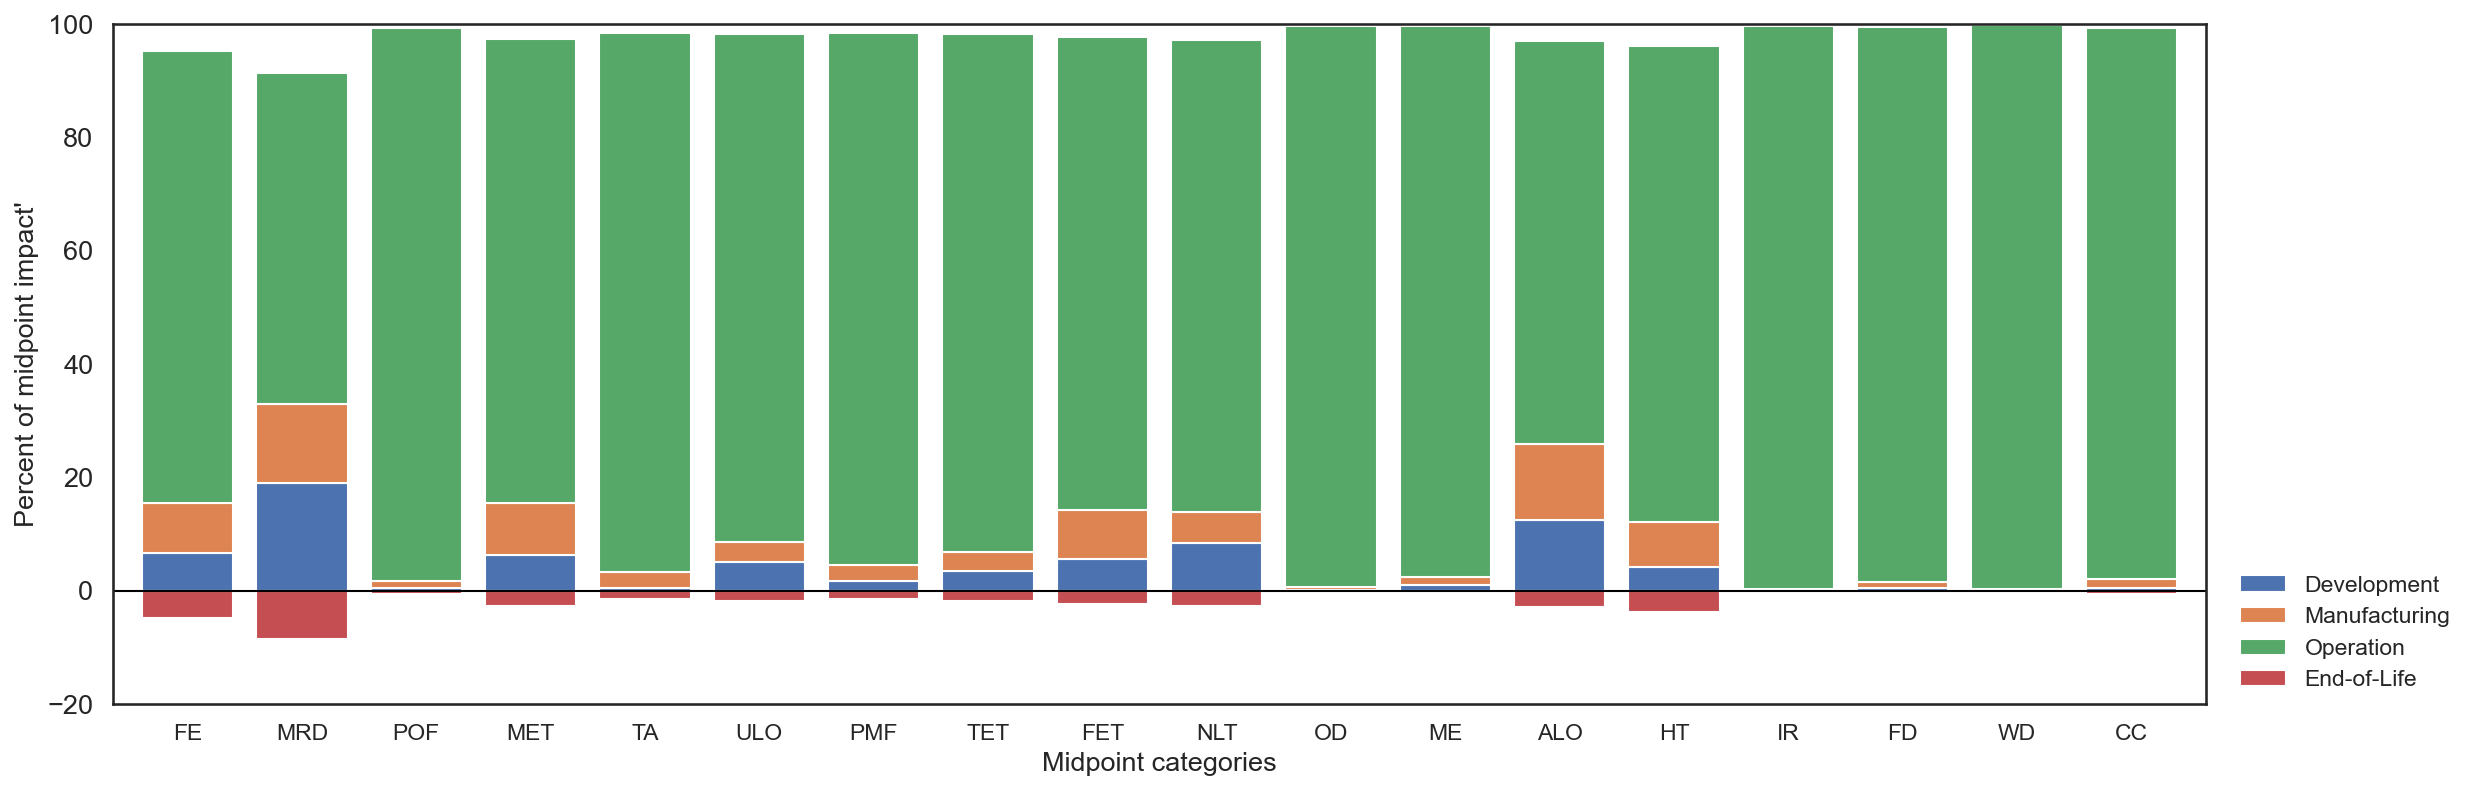

In [6]:
echo.bar(pathway='MP', subphase=False, save=True)

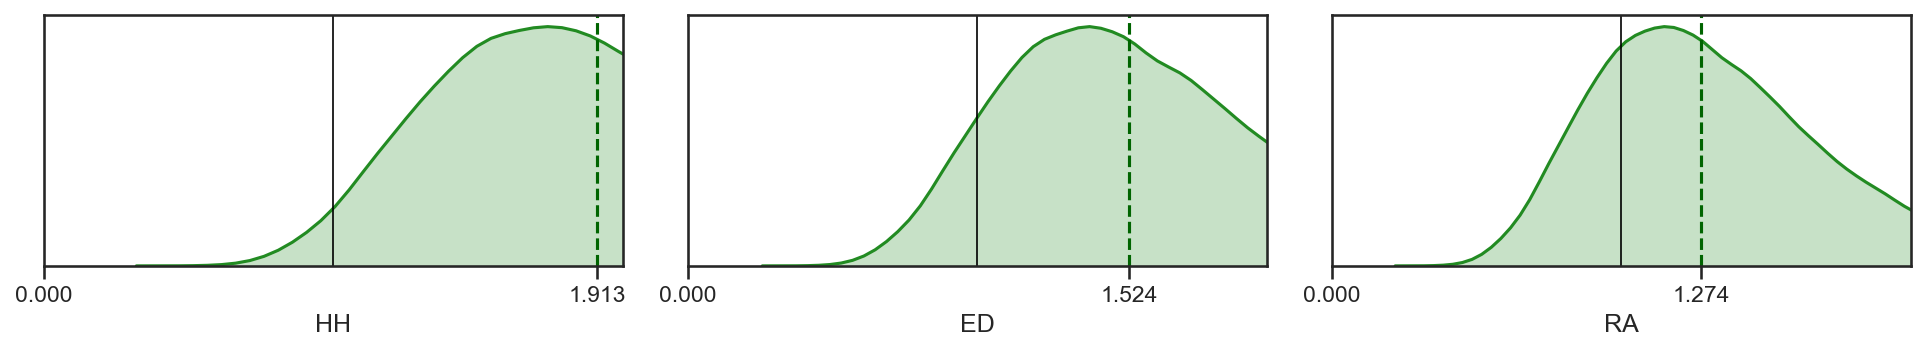

In [55]:
dist_compare_phase(echo, composite,  phase="Manufacturing", save=True)

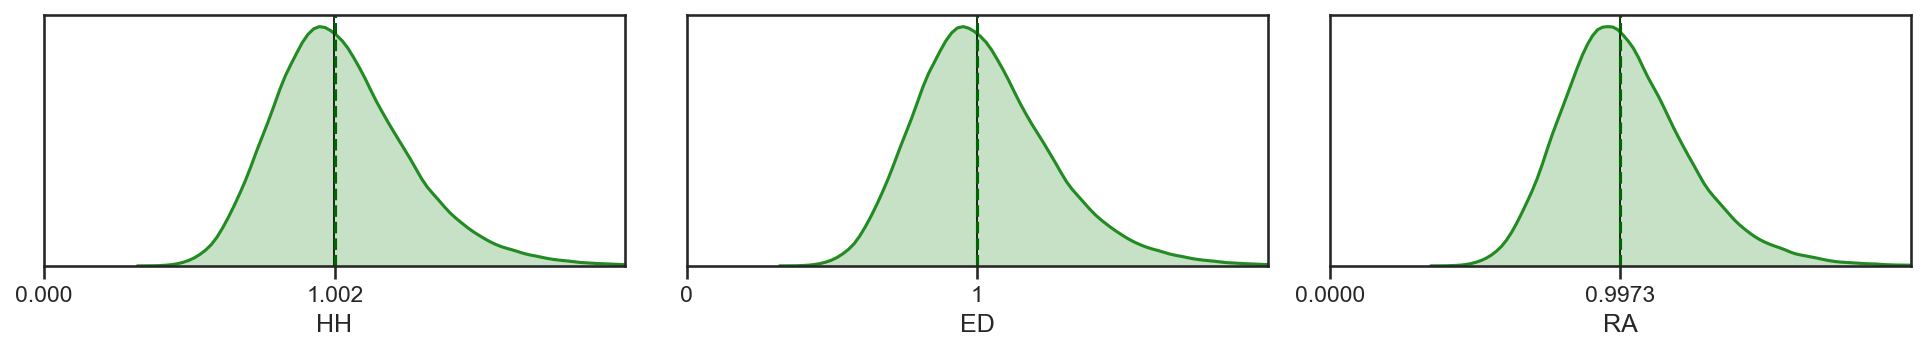

In [56]:
dist_compare_phases(echo, composite, save=True)

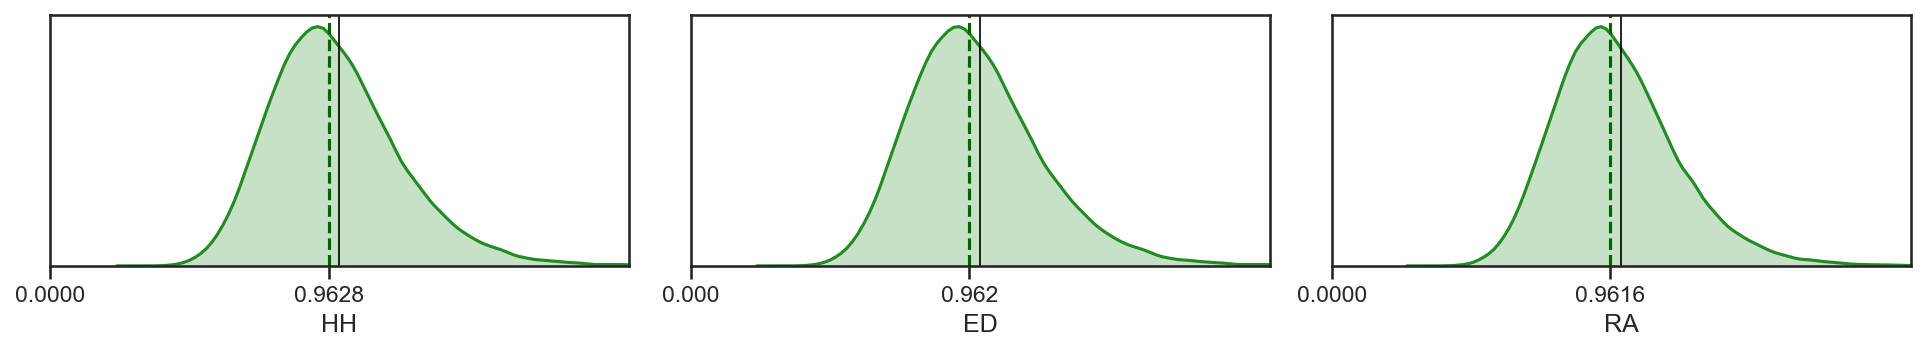

In [60]:
dist_compare_phases(echo, bravo, save=True)

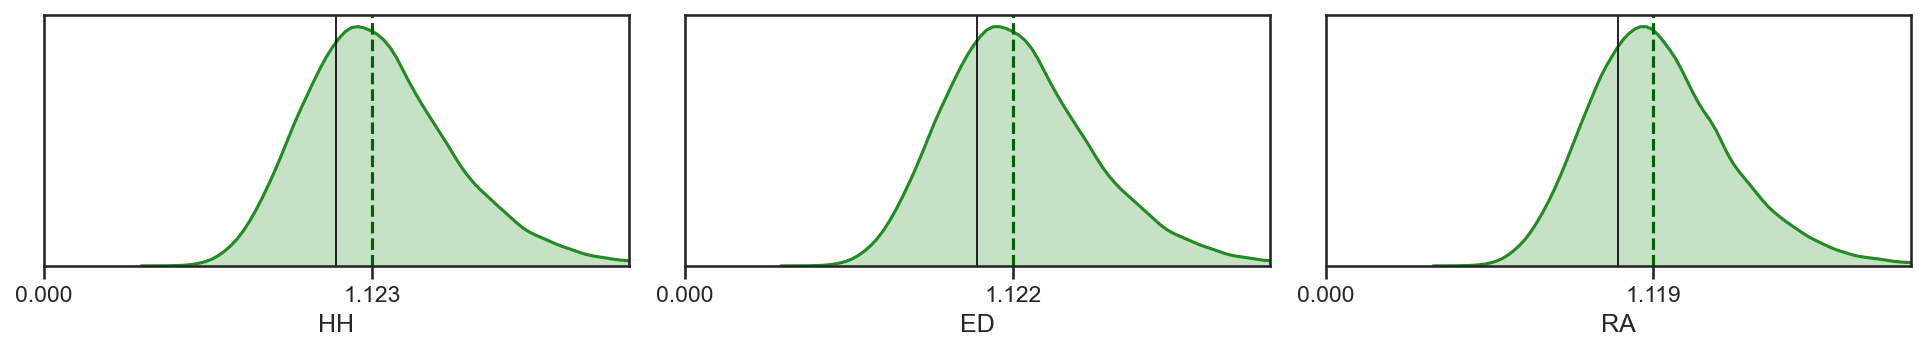

In [57]:
dist_compare_phases(echo, composite_fuel, save=True)

In [19]:
teste = echo.compare(composite_fuel, pathway='EP')
comparePercent(teste)

<xarray.Dataset>
Dimensions:  ()
Data variables:
    HH       float64 29.88
    ED       float64 30.29
    RA       float64 29.35
Attributes:
    Numerator:    Echo
    Denominator:  Composite_fuel